# t-SNE 範例
* 觀察S曲線使用 t-SNE 不同 perplexity 的流形還原效果

In [1]:
# 載入套件
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from time import time

In [2]:
# 設定模型與繪圖參數
n_samples = 300
n_components = 2
perplexities = np.arange(50, 500, 50)

# 設定S曲線資料點
X, color = datasets.make_s_curve(n_samples, random_state=0)

print(X[:5])

[[ 0.44399868  1.813111   -0.10397256]
 [ 0.89724097  1.54809467 -1.44154121]
 [ 0.8240493   0.6662903  -0.43348191]
 [ 0.41051068  0.16220278 -0.08814421]
 [-0.65903619  0.81448234  0.24788877]]


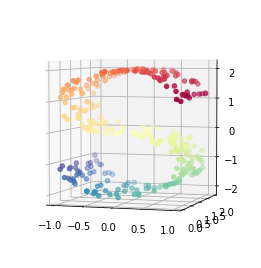

In [3]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(25, 10))
ax = fig.add_subplot(251, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)

# 作業
* 將原始資料集換為S型圖, 觀察不同 perplexity 下的流形還原結果

In [4]:
def plot_t_SNE(data_s_curve, perplexities):
    X = data_s_curve
    
    cols = 5
    rows = ((len(perplexities)+1-1) // cols) + 1
    (fig, subplots) = plt.subplots(rows, cols, figsize=(15, 6))

    # 繪製資料原圖
    ax = subplots[0][0]
    ax.set_title("Original")
    ax.scatter(X[:, 0], X[:, 2], c=color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')

    # 繪製不同 perplexity 下的 t-SNE 分群圖
    axes = subplots.ravel()[1:]
    for ax, perplexity in zip(axes, perplexities):
        t0 = time()
        tsne = manifold.TSNE(n_components=n_components, init='random',
                             random_state=0, perplexity=perplexity)
        Y = tsne.fit_transform(X)
        t1 = time()
        print("s-curve, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
        ax.set_title("Perplexity=%d" % perplexity)
        ax.scatter(Y[:, 0], Y[:, 1], c=color)
        ax.xaxis.set_major_formatter(NullFormatter())
        ax.yaxis.set_major_formatter(NullFormatter())
        ax.axis('tight')

    plt.show()

s-curve, perplexity=50 in 1.9 sec
s-curve, perplexity=100 in 2.5 sec
s-curve, perplexity=150 in 2 sec
s-curve, perplexity=200 in 2 sec
s-curve, perplexity=250 in 1.9 sec
s-curve, perplexity=300 in 1.3 sec
s-curve, perplexity=350 in 1.3 sec
s-curve, perplexity=400 in 1.2 sec
s-curve, perplexity=450 in 1.2 sec


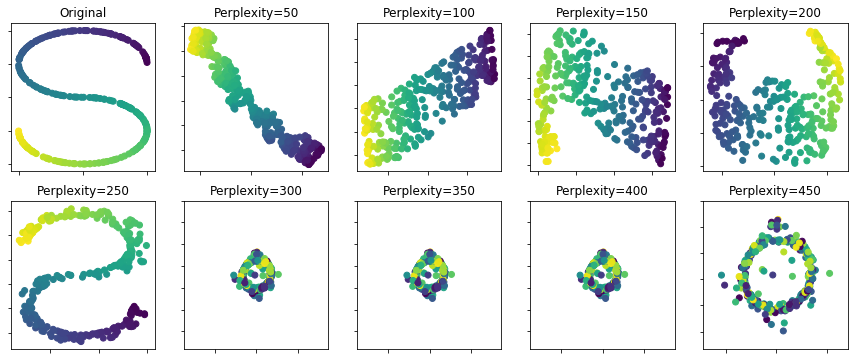

In [5]:
plot_t_SNE(X, perplexities)

[[ 4.43998676e-01  9.06555499e-03 -1.03972559e-01]
 [ 8.97240971e-01  7.74047333e-03 -1.44154121e+00]
 [ 8.24049301e-01  3.33145152e-03 -4.33481907e-01]
 [ 4.10510678e-01  8.11013900e-04 -8.81442091e-02]
 [-6.59036188e-01  4.07241171e-03  2.47888769e-01]]
s-curve, perplexity=50 in 1.8 sec
s-curve, perplexity=100 in 2.3 sec
s-curve, perplexity=150 in 2.4 sec
s-curve, perplexity=200 in 1.9 sec
s-curve, perplexity=250 in 1.9 sec
s-curve, perplexity=300 in 1.2 sec
s-curve, perplexity=350 in 1.2 sec
s-curve, perplexity=400 in 1.2 sec
s-curve, perplexity=450 in 1.2 sec


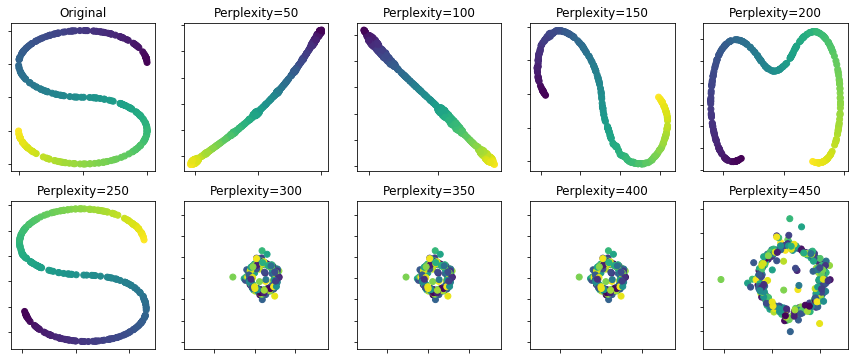

In [6]:
# 壓縮 其中一維資料
X_compress = X.copy()
X_compress[:, 1] = X[:, 1] * 0.005

print(X_compress[:5])

plot_t_SNE(X_compress, perplexities)

觀察結果
- 原始資料: perplexity=250, 出現和原始資料近似圖形，但圖形反轉對稱
- 壓縮未顯示之一維資料: 壓縮資料維度時, perplexity=250, 出現和原始資料完全相近圖形 
- 執行時間並非與 perplexity 成正比

ref:  
[t-SNE: The effect of various perplexity values on the shape](https://scikit-learn.org/stable/auto_examples/manifold/plot_t_sne_perplexity.html#sphx-glr-auto-examples-manifold-plot-t-sne-perplexity-py) <br/>
[sklearn.manifold.TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html#sklearn.manifold.TSNE.fit_transform) <br/>
[Comparison of Manifold Learning methods](https://scikit-learn.org/stable/auto_examples/manifold/plot_compare_methods.html#sphx-glr-auto-examples-manifold-plot-compare-methods-py) <br/>
    